# Exploratory Data Analysis and Data Visualization

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.style as style
style.use('ggplot')

import seaborn as sns
sns.set(style='white', context='notebook', color_codes=True) 
sns.set_context('talk') # Set defaults for graphs

# Set options
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 10000)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Set today's date
import datetime as dt
today = dt.datetime.today().strftime("%Y.%m.%d")

## Load Data and Inspect Structure

In [2]:
# Load the Data
Crime_Stats = pd.read_csv('SouthAfricaCrimeStats_v2.csv')

Population = pd.read_csv('ProvincePopulation.csv')

In [3]:
Crime_Stats.head(10)

Province            Station                           Category  \
0   Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1        Gauteng        Jhb Central  All theft not mentioned elsewhere   
2   Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3     Free State          Park Road  All theft not mentioned elsewhere   
4        Gauteng   Pretoria Central  All theft not mentioned elsewhere   
5     North West         Rustenburg  All theft not mentioned elsewhere   
6  Kwazulu/Natal     Durban Central  All theft not mentioned elsewhere   
7        Gauteng           Brooklyn  All theft not mentioned elsewhere   
8        Gauteng           Booysens  All theft not mentioned elsewhere   
9        Gauteng           Hillbrow  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   
5       4239       4173       3398       3388       2737       2117   
6       4162       4529       3499       3353       3183       2933   
7       3931       3583       2878       2568       2415       2162   
8       3681       3277       2849       2603       2580       3107   
9       3489       2914       3093       2706       2250       2298   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0       5285       5937       5600       5335       5176  
1       2886       2638       2809       3050       2434  
2       6108       5514       4975       4043       3635  
3       2679       3116       2927       2297       2103  
4       2635       3226       3246       2892       3030  
5       2139       1914       1897       1868       1862  
6       3219       3418       3390       2872       2865  
7       2050       1883       2442       2200       2107  
8       2568       1339       1290       1039        943  
9       2051       1835       1610       1607       1618

In [4]:
Crime_Stats.tail(10)

Province        Station  \
30851        Limpopo     Westenburg   
30852     Free State        Zamdela   
30853        Gauteng  Mamelodi East   
30854        Gauteng      Diepsloot   
30855  Kwazulu/Natal     Kwamashu E   
30856   Western Cape         Belhar   
30857        Gauteng     Moffatview   
30858   Western Cape         Belhar   
30859   Western Cape      Lentegeur   
30860   Western Cape      Lentegeur   

                                                Category  2005-2006  \
30851                  All theft not mentioned elsewhere          0   
30852                                     Common assault          0   
30853  Assault with the intent to inflict grievous bo...          0   
30854  Assault with the intent to inflict grievous bo...          0   
30855                                        Shoplifting          0   
30856                  All theft not mentioned elsewhere          0   
30857                  All theft not mentioned elsewhere          0   
30858                                 Drug-related crime          0   
30859                  All theft not mentioned elsewhere          0   
30860                                 Drug-related crime          0   

       2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  2011-2012  \
30851          0          0          0          0          0          0   
30852          0          0          0          0          0        567   
30853        489        834        774        797        588        645   
30854          0          0          0          0        156        590   
30855          0          0          0          0        170        364   
30856          0        250        837        710        746        839   
30857          0          0          0          0          0          0   
30858          0         54        238        291        583        840   
30859          0          0          0          0          0          0   
30860          0          0          0          0          0          0   

       2012-2013  2013-2014  2014-2015  2015-2016  
30851        698        758        644        691  
30852        649        756        562        692  
30853        650        664        766        732  
30854        594        612        528        776  
30855        439        468        829        802  
30856        762        882       1015        829  
30857       1012       1195       1294        991  
30858       1117       1197       1237       1401  
30859          0       1300       2346       1989  
30860          0       1126       1933       2050

In [5]:
Population.head()

Province  Population    Area  Density
0        Gauteng    12272263   18178   675.10
1  Kwazulu/Natal    10267300   94361   108.80
2     Mpumalanga     4039939   76495    52.80
3   Western Cape     5822734  129462    45.00
4        Limpopo     5404868  125755    43.00

In [6]:
Population.tail()

Province  Population    Area  Density
4        Limpopo     5404868  125755    43.00
5   Eastern Cape     6562053  168966    38.80
6     North West     3509953  104882    33.50
7     Free State     2745590  129825    21.10
8  Northern Cape     1145861  372889     3.10

In [7]:
Crime_Stats.shape

(30861, 14)

In [8]:
Crime_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
Province     30861 non-null object
Station      30861 non-null object
Category     30861 non-null object
2005-2006    30861 non-null int64
2006-2007    30861 non-null int64
2007-2008    30861 non-null int64
2008-2009    30861 non-null int64
2009-2010    30861 non-null int64
2010-2011    30861 non-null int64
2011-2012    30861 non-null int64
2012-2013    30861 non-null int64
2013-2014    30861 non-null int64
2014-2015    30861 non-null int64
2015-2016    30861 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.3+ MB


In [9]:
Population.shape

(9, 4)

In [10]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Province      9 non-null object
Population    9 non-null int64
Area          9 non-null int64
Density       9 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 368.0+ bytes


## Summary Statistics

In [11]:
Crime_Stats.dtypes

Province     object
Station      object
Category     object
2005-2006     int64
2006-2007     int64
2007-2008     int64
2008-2009     int64
2009-2010     int64
2010-2011     int64
2011-2012     int64
2012-2013     int64
2013-2014     int64
2014-2015     int64
2015-2016     int64
dtype: object

In [12]:
Population.dtypes

Province       object
Population      int64
Area            int64
Density       float64
dtype: object

In [13]:
Crime_Stats.describe().transpose()

count  mean    std  min  25%   50%   75%     max
2005-2006 30861.00 70.53 205.49 0.00 0.00  8.00 49.00 6692.00
2006-2007 30861.00 69.30 198.04 0.00 0.00  8.00 50.00 6341.00
2007-2008 30861.00 67.15 186.76 0.00 0.00  8.00 50.00 6316.00
2008-2009 30861.00 68.76 187.17 0.00 0.00  9.00 52.00 6803.00
2009-2010 30861.00 69.52 185.51 0.00 1.00  9.00 54.00 6571.00
2010-2011 30861.00 67.77 181.87 0.00 0.00  9.00 52.00 6260.00
2011-2012 30861.00 68.26 183.33 0.00 1.00 10.00 53.00 6108.00
2012-2013 30861.00 69.70 184.81 0.00 1.00 10.00 55.00 6310.00
2013-2014 30861.00 71.42 187.64 0.00 1.00 11.00 56.00 6044.00
2014-2015 30861.00 71.50 185.02 0.00 1.00 11.00 57.00 5335.00
2015-2016 30861.00 70.74 179.36 0.00 1.00 11.00 58.00 5176.00

In [14]:
Crime_Stats.describe(exclude=['float64', 'int64']).transpose()

count unique                 top  freq
Province  30861      9        Eastern Cape  5292
Station   30861   1143            Atlantis    27
Category  30861     27  Drug-related crime  1143

In [15]:
Population.describe().transpose()

count       mean        std        min        25%        50%  \
Population   9.00 5752284.56 3568900.35 1145861.00 3509953.00 5404868.00   
Area         9.00  135645.89   98433.27   18178.00   94361.00  125755.00   
Density      9.00     113.47     212.56       3.10      33.50      43.00   

                  75%         max  
Population 6562053.00 12272263.00  
Area        129825.00   372889.00  
Density         52.80      675.10

# Q1a

In [16]:
# Join Crime Statistics Data with Population table 
Crime_Stats_Population = pd.merge(Crime_Stats, Population, on='Province')

Crime_Stats_Population

Province               Station  \
0       Western Cape     Cape Town Central   
1       Western Cape       Mitchells Plain   
2       Western Cape     Cape Town Central   
3       Western Cape       Mitchells Plain   
4       Western Cape             Bellville   
5       Western Cape       Mitchells Plain   
6       Western Cape             Milnerton   
7       Western Cape             Claremont   
8       Western Cape                 Parow   
9       Western Cape            Ravensmead   
10      Western Cape       Mitchells Plain   
11      Western Cape             Worcester   
12      Western Cape          Stellenbosch   
13      Western Cape          Bishop Lavis   
14      Western Cape             Woodstock   
15      Western Cape             Worcester   
16      Western Cape       Mitchells Plain   
17      Western Cape       Mitchells Plain   
18      Western Cape             Woodstock   
19      Western Cape                Strand   
20      Western Cape            Table View   
21      Western Cape                 Delft   
22      Western Cape       Mitchells Plain   
23      Western Cape         Somerset West   
24      Western Cape          Kraaifontein   
25      Western Cape             Claremont   
26      Western Cape             Sea Point   
27      Western Cape                 Paarl   
28      Western Cape                George   
29      Western Cape          Elsies River   
30      Western Cape              Goodwood   
31      Western Cape           Kuilsrivier   
32      Western Cape           Brackenfell   
33      Western Cape           Durbanville   
34      Western Cape               Athlone   
35      Western Cape             Kleinvlei   
36      Western Cape       Mitchells Plain   
37      Western Cape     Cape Town Central   
38      Western Cape     Cape Town Central   
39      Western Cape     Cape Town Central   
40      Western Cape             Worcester   
41      Western Cape                Nyanga   
42      Western Cape             Bellville   
43      Western Cape          Bishop Lavis   
44      Western Cape            Dieprivier   
45      Western Cape             Gugulethu   
46      Western Cape            Table View   
47      Western Cape                 Delft   
48      Western Cape                Nyanga   
49      Western Cape             Sea Point   
50      Western Cape           Khayelitsha   
51      Western Cape             Steenberg   
52      Western Cape             Kleinvlei   
53      Western Cape             Lansdowne   
54      Western Cape               Wynberg   
55      Western Cape          Stellenbosch   
56      Western Cape                Knysna   
57      Western Cape     Cape Town Central   
58      Western Cape           Grassy Park   
59      Western Cape          Kraaifontein   
60      Western Cape              Philippi   
61      Western Cape       Mitchells Plain   
62      Western Cape             Worcester   
63      Western Cape           Khayelitsha   
64      Western Cape     Cape Town Central   
65      Western Cape                Knysna   
66      Western Cape             Gugulethu   
67      Western Cape             Manenberg   
68      Western Cape           Grassy Park   
69      Western Cape     Cape Town Central   
70      Western Cape              Philippi   
71      Western Cape             Steenberg   
72      Western Cape                Strand   
73      Western Cape               Athlone   
74      Western Cape          Elsies River   
75      Western Cape            Muizenberg   
76      Western Cape            Oudtshoorn   
77      Western Cape             Gugulethu   
78      Western Cape             Gugulethu   
79      Western Cape             Pinelands   
80      Western Cape     Cape Town Central   
81      Western Cape             Worcester   
82      Western Cape       Mitchells Plain   
83      Western Cape           Khayelitsha   
84      Western Cape              Maitland   
85      Western Cape            Muizenberg   
86      We

# Q1b

In [17]:
Dangerous_Place = Crime_Stats_Population.pivot_table(index='Province',aggfunc=np.sum)

In [18]:
#Dangerous_Place = Dangerous_Place.drop(Columns=['Population', 'Area', 'Density])
#Dangerous_Place

New = Dangerous_Place.drop(columns=['Population', 'Area', 'Density'])
New

2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  \
Province                                                               
Eastern Cape      238977     228884     220813     216658     217230   
Free State        137987     128227     127955     132335     127512   
Gauteng           654817     639635     615618     638186     640074   
Kwazulu/Natal     345784     343798     328368     340095     349103   
Limpopo           106983     104857      97166      97565      99610   
Mpumalanga        134829     131444     125954     131410     128814   
North West        118840     112471     112340     117118     115680   
Northern Cape      56515      52689      48954      50277      49746   
Western Cape      381825     396712     395281     398240     417619   

               2010-2011  2011-2012  2012-2013  2013-2014  2014-2015  \
Province                                                               
Eastern Cape      215012     214462     209124     210248     202582   
Free State        121997     126389     131785     126290     118879   
Gauteng           609305     577959     584315     636195     637332   
Kwazulu/Natal     343767     348411     362677     355729     348394   
Limpopo            96475     113630     112952     117638     124986   
Mpumalanga        122402     122186     121169     115996     117203   
North West        109922     111028     115319     113935     114270   
Northern Cape      45618      45257      47697      48947      49897   
Western Cape      426850     447238     465994     479022     492963   

               2015-2016  
Province                  
Eastern Cape      196089  
Free State        117688  
Gauteng           622218  
Kwazulu/Natal     342772  
Limpopo           129323  
Mpumalanga        119526  
North West        114335  
Northern Cape      50665  
Western Cape      490383

In [19]:
New.idxmax(axis=0, skipna=True)

2005-2006    Gauteng
2006-2007    Gauteng
2007-2008    Gauteng
2008-2009    Gauteng
2009-2010    Gauteng
2010-2011    Gauteng
2011-2012    Gauteng
2012-2013    Gauteng
2013-2014    Gauteng
2014-2015    Gauteng
2015-2016    Gauteng
dtype: object

# Q1c

In [20]:
Max = np.max(New, axis=1)
Max

Province
Eastern Cape     238977
Free State       137987
Gauteng          654817
Kwazulu/Natal    362677
Limpopo          129323
Mpumalanga       134829
North West       118840
Northern Cape     56515
Western Cape     492963
dtype: int64

In [21]:
Highest = Max.idxmax()
print(Highest, Max.max())

Gauteng 654817


# Q 1d

In [22]:
Rank = Crime_Stats_Population.drop(columns=['Population', 'Area', 'Density'])
Rank = Rank.pivot_table(index='Category').rank(method='average', ascending=False)
Rank.head()


2005-2006  2006-2007  \
Category                                                                   
All theft not mentioned elsewhere                        1.00       1.00   
Arson                                                   22.00      22.00   
Assault with the intent to inflict grievous bod...       3.00       3.00   
Attempted murder                                        17.00      17.00   
Bank robbery                                            26.00      26.00   

                                                    2007-2008  2008-2009  \
Category                                                                   
All theft not mentioned elsewhere                        1.00       1.00   
Arson                                                   23.00      23.00   
Assault with the intent to inflict grievous bod...       3.00       3.00   
Attempted murder                                        17.00      18.00   
Bank robbery                                            26.00      26.00   

                                                    2009-2010  2010-2011  \
Category                                                                   
All theft not mentioned elsewhere                        1.00       1.00   
Arson                                                   23.00      23.00   
Assault with the intent to inflict grievous bod...       3.00       3.00   
Attempted murder                                        18.00      19.00   
Bank robbery                                            26.00      26.00   

                                                    2011-2012  2012-2013  \
Category                                                                   
All theft not mentioned elsewhere                        1.00       1.00   
Arson                                                   23.00      23.00   
Assault with the intent to inflict grievous bod...       3.00       4.00   
Attempted murder                                        20.00      19.00   
Bank robbery                                            27.00      27.00   

                                                    2013-2014  2014-2015  \
Category                                                                   
All theft not mentioned elsewhere                        1.00       1.00   
Arson                                                   23.00      24.00   
Assault with the intent to inflict grievous bod...       4.00       4.00   
Attempted murder                                        20.00      20.00   
Bank robbery                                            27.00      27.00   

                                                    2015-2016  
Category                                                       
All theft not mentioned elsewhere                        1.00  
Arson                                                   24.00  
Assault with the intent to inflict grievous bod...       4.00  
Attempted murder                                        20.00  
Bank robbery                                            27.00

# 2a

In [23]:
# Density

# 2b

In [24]:
# Create new Dataframe 'Comb' and sum the values of each Year for each province
New_Column = [str(Year)+'-'+str(Year+1) for Year in range(2005, 2016)]
Comb = Crime_Stats_Population.groupby(['Province'], sort=False) [New_Column].agg('sum').reset_index()
Comb

Province  2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  \
0   Western Cape     381825     396712     395281     398240     417619   
1        Gauteng     654817     639635     615618     638186     640074   
2     Free State     137987     128227     127955     132335     127512   
3     North West     118840     112471     112340     117118     115680   
4  Kwazulu/Natal     345784     343798     328368     340095     349103   
5     Mpumalanga     134829     131444     125954     131410     128814   
6   Eastern Cape     238977     228884     220813     216658     217230   
7        Limpopo     106983     104857      97166      97565      99610   
8  Northern Cape      56515      52689      48954      50277      49746   

   2010-2011  2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  
0     426850     447238     465994     479022     492963     490383  
1     609305     577959     584315     636195     637332     622218  
2     121997     126389     131785     126290     118879     117688  
3     109922     111028     115319     113935     114270     114335  
4     343767     348411     362677     355729     348394     342772  
5     122402     122186     121169     115996     117203     119526  
6     215012     214462     209124     210248     202582     196089  
7      96475     113630     112952     117638     124986     129323  
8      45618      45257      47697      48947      49897      50665

In [25]:
Crime_Rate = Comb.sum(axis=1).reset_index()
Crime_Rate

Prov_Crime = Population
Prov_Crime['Crimes'] = [int(i) for i in Crime_Rate[0]]
Prov_Crime


Province  Population    Area  Density   Crimes
0        Gauteng    12272263   18178   675.10  4792127
1  Kwazulu/Natal    10267300   94361   108.80  6855654
2     Mpumalanga     4039939   76495    52.80  1397044
3   Western Cape     5822734  129462    45.00  1255258
4        Limpopo     5404868  125755    43.00  3808898
5   Eastern Cape     6562053  168966    38.80  1370933
6     North West     3509953  104882    33.50  2370079
7     Free State     2745590  129825    21.10  1201185
8  Northern Cape     1145861  372889     3.10   546262

In [26]:
# Cmpare Population density and Crime rate
Prov_Crime['Density'].corr(Prov_Crime['Crimes']).round(decimals = 2)

0.49

In [27]:
# We could say that places with higher population density don't necessarily have a higher crime rate.
# The result above shows about 49% correlation

# 3a

In [28]:
# Group by Crime Type
Crime_Type = Crime_Stats_Population.groupby('Category')
Crime_Type.first()

Province  \
Category                                                           
All theft not mentioned elsewhere                   Western Cape   
Arson                                               Western Cape   
Assault with the intent to inflict grievous bod...  Western Cape   
Attempted murder                                    Western Cape   
Bank robbery                                        Western Cape   
Burglary at non-residential premises                Western Cape   
Burglary at residential premises                    Western Cape   
Carjacking                                          Western Cape   
Commercial crime                                    Western Cape   
Common assault                                      Western Cape   
Common robbery                                      Western Cape   
Driving under the influence of alcohol or drugs     Western Cape   
Drug-related crime                                  Western Cape   
Illegal possession of firearms and ammunition       Western Cape   
Malicious damage to property                        Western Cape   
Murder                                              Western Cape   
Robbery at non-residential premises                 Western Cape   
Robbery at residential premises                     Western Cape   
Robbery of cash in transit                          Western Cape   
Robbery with aggravating circumstances              Western Cape   
Sexual Offences                                     Western Cape   
Sexual offences as result of police action          Western Cape   
Shoplifting                                         Western Cape   
Stock-theft                                         Western Cape   
Theft of motor vehicle and motorcycle               Western Cape   
Theft out of or from motor vehicle                  Western Cape   
Truck hijacking                                     Western Cape   

                                                              Station  \
Category                                                                
All theft not mentioned elsewhere                   Cape Town Central   
Arson                                                          Nyanga   
Assault with the intent to inflict grievous bod...          Worcester   
Attempted murder                                               Nyanga   
Bank robbery                                                Bellville   
Burglary at non-residential premises                Cape Town Central   
Burglary at residential premises                      Mitchells Plain   
Carjacking                                                  Gugulethu   
Commercial crime                                    Cape Town Central   
Common assault                                        Mitchells Plain   
Common robbery                                        Mitchells Plain   
Driving under the influence of alcohol or drugs       Mitchells Plain   
Drug-related crime                                    Mitchells Plain   
Illegal possession of firearms and ammunition         Mitchells Plain   
Malicious damage to property                          Mitchells Plain   
Murder                                                         Nyanga   
Robbery at non-residential premises                         Claremont   
Robbery at residential premises                                Nyanga   
Robbery of cash in transit                               Bishop Lavis   
Robbery with aggravating circumstances                Mitchells Plain   
Sexual Offences                                       Mitchells Plain   
Sexual offences as result of police action                 Albertinia   
Shoplifting                                           Mitchells Plain   
Stock-theft                                             Beaufort West   
Theft of motor vehicle and motorcycle                 Mitchells Plain   
Theft out of or from motor vehicle                  Cape Town Central   
Truck hijacking                        

# 3b

In [29]:
# Province With Drug-Related Crimes
Drug_Crimes = Crime_Stats_Population.loc[Crime_Stats_Population['Category'] == 'Drug-related crime']
Drug_Crimes.head(10)

Province            Station            Category  2005-2006  \
3    Western Cape    Mitchells Plain  Drug-related crime       3064   
38   Western Cape  Cape Town Central  Drug-related crime       1171   
43   Western Cape       Bishop Lavis  Drug-related crime       1091   
51   Western Cape          Steenberg  Drug-related crime        989   
70   Western Cape           Philippi  Drug-related crime        835   
74   Western Cape       Elsies River  Drug-related crime        815   
116  Western Cape           Conville  Drug-related crime        665   
120  Western Cape          Manenberg  Drug-related crime        650   
126  Western Cape          Kleinvlei  Drug-related crime        633   
138  Western Cape              Delft  Drug-related crime        598   

     2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  2011-2012  \
3         3683       4792       5699       6571       6260       5850   
38        1303       1457       1393       1474       1539       1832   
43        1333       1348       1430       1759       2459       2753   
51        1174       1234       1588       1656       1711       1352   
70         894        973       1013       1108       1342       1608   
74        1193       1410       2030       2647       2602       1871   
116        549        696       1004        618        649        685   
120        502        827       1150       1556       2353       3672   
126        883       1126       1418       1931       1993       2049   
138        832        811        868       1080       2118       2770   

     2012-2013  2013-2014  2014-2015  2015-2016  Population    Area  Density  
3         6310       6044       4768       4609     5822734  129462    45.00  
38        1963       2149       2360       2712     5822734  129462    45.00  
43        2977       2577       2738       2472     5822734  129462    45.00  
51        1630       1273       1456       1831     5822734  129462    45.00  
70        1834       1944       2067       2030     5822734  129462    45.00  
74        1944       1354       1406       1497     5822734  129462    45.00  
116        676        783        954        995     5822734  129462    45.00  
120       3983       3766       3191       2508     5822734  129462    45.00  
126       2149       1874       1561       1541     5822734  129462    45.00  
138       3381       2953       3035       3439     5822734  129462    45.00

In [30]:
# Province with High Drug-related above 1000 on average per year
Drugs_Crimes_High =Crime_Stats_Population.loc[(Crime_Stats_Population['2005-2006']>1000) | (Crime_Stats_Population['2006-2007']>1000) |(Crime_Stats_Population['2007-2008']>1000)|(Crime_Stats_Population['2008-2009']>1000)|(Crime_Stats_Population['2009-2010']>1000)|(Crime_Stats_Population['2010-2011']>1000) |(Crime_Stats_Population['2011-2012']>1000)|(Crime_Stats_Population['2012-2013']>1000)|(Crime_Stats_Population['2013-2014']>1000)|(Crime_Stats_Population['2014-2015']>1000)|(Crime_Stats_Population['2015-2016']>1000)]
Drugs_Crimes_High.head()

                                  

Province            Station                            Category  \
0  Western Cape  Cape Town Central   All theft not mentioned elsewhere   
1  Western Cape    Mitchells Plain   All theft not mentioned elsewhere   
2  Western Cape  Cape Town Central  Theft out of or from motor vehicle   
3  Western Cape    Mitchells Plain                  Drug-related crime   
4  Western Cape          Bellville   All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       5341       6093       6316       6803       6035       5761   
2       3468       2924       2329       1856       2905       3051   
3       3064       3683       4792       5699       6571       6260   
4       3010       2828       2721       2911       2691       2180   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  Population    Area  \
0       5285       5937       5600       5335       5176     5822734  129462   
1       6108       5514       4975       4043       3635     5822734  129462   
2       3474       3294       3612       3441       3509     5822734  129462   
3       5850       6310       6044       4768       4609     5822734  129462   
4       2435       2231       2249       2136       1839     5822734  129462   

   Density  
0    45.00  
1    45.00  
2    45.00  
3    45.00  
4    45.00

In [31]:
Avg_Drugs_Crimes_High = Drugs_Crimes_High.groupby(['Province'],sort=False).agg('sum')
Avg_Drugs_Crimes_High

2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  \
Province                                                               
Western Cape      127473     134501     134425     136265     138843   
Gauteng           219121     205610     192550     192453     188985   
Free State         18599      16599      16418      17596      15781   
North West         19225      16869      16153      18166      17260   
Kwazulu/Natal      67248      66715      60486      61098      62829   
Mpumalanga         20567      18202      16231      16246      17419   
Eastern Cape       30416      29783      26744      24065      22314   
Limpopo            12265      10624       9430       9091       8410   
Northern Cape       4797       4429       4176       3889       3454   

               2010-2011  2011-2012  2012-2013  2013-2014  2014-2015  \
Province                                                               
Western Cape      144954     157621     161260     163152     164515   
Gauteng           185263     176297     175237     193458     188370   
Free State         14820      14920      16111      14848      13492   
North West         13995      13829      15612      14410      14045   
Kwazulu/Natal      62468      63871      65798      64404      62983   
Mpumalanga         17919      18842      19227      17495      17260   
Eastern Cape       23932      22940      21317      19021      17292   
Limpopo             8128      11443       8116       8867       9243   
Northern Cape       3185       3195       3372       3636       3490   

               2015-2016  Population      Area   Density  
Province                                                  
Western Cape      162213   663791676  14758668   5130.00  
Gauteng           172986  2209007340   3272040 121518.00  
Free State         12084    38438260   1817550    295.40  
North West         14466    49139342   1468348    469.00  
Kwazulu/Natal      60902   605770700   5567299   6419.20  
Mpumalanga         16367    68678963   1300415    897.60  
Eastern Cape       15818   170613378   4393116   1008.80  
Limpopo             8891    54048680   1257550    430.00  
Northern Cape       3255     3437583   1118667      9.30

# 3c

In [32]:
# Province with the highest number of station
Prov_Stations = Crime_Stats_Population.groupby(['Station'],sort=False)

for j in Population['Province']:
    print((j,list(Crime_Stats_Population['Province']).count(j)))
Prov_Stations

('Gauteng', 3861)
('Kwazulu/Natal', 5022)
('Mpumalanga', 2322)
('Western Cape', 4050)
('Limpopo', 2673)
('Eastern Cape', 5292)
('North West', 2214)
('Free State', 2970)
('Northern Cape', 2457)


# Q6

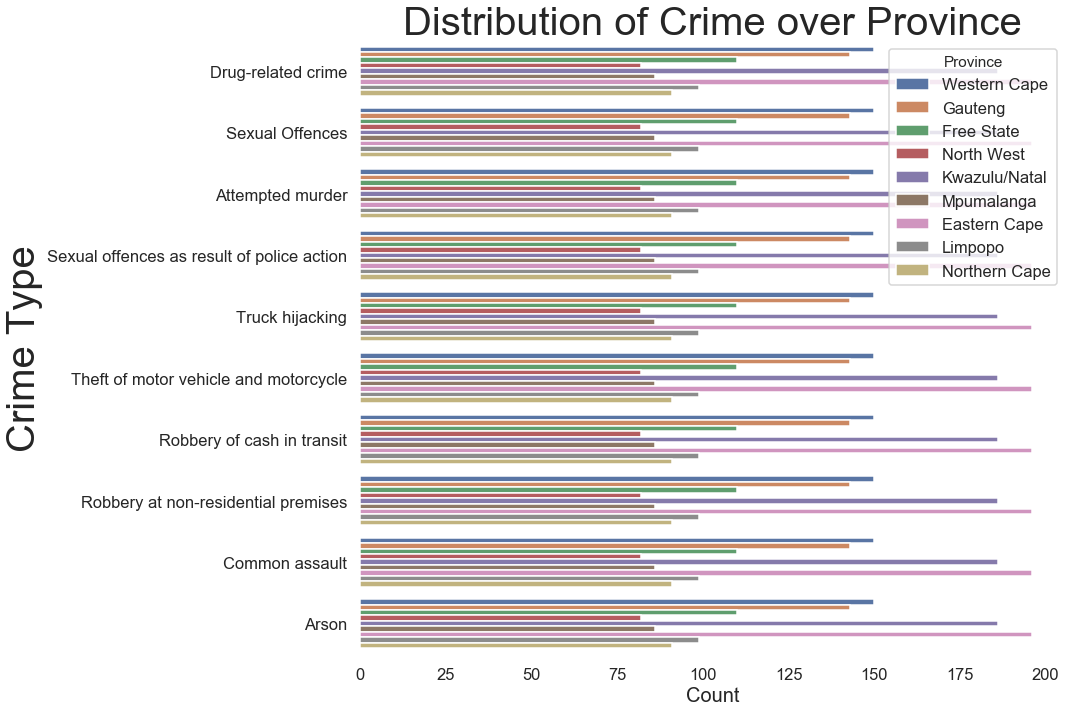

In [33]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(y="Category", hue="Province", data=Crime_Stats, order = Crime_Stats['Category'].value_counts()[:10].index)
sns.despine(left=True, bottom=True) # removes upper and right border lines from chart
plt.title('Distribution of Crime over Province',fontsize=40)
plt.ylabel('Crime Type',fontsize=40)
plt.xlabel('Count',fontsize=20)
fig.tight_layout()
plt.savefig('Jonas_image_01.jpg') # output image file
plt.show()

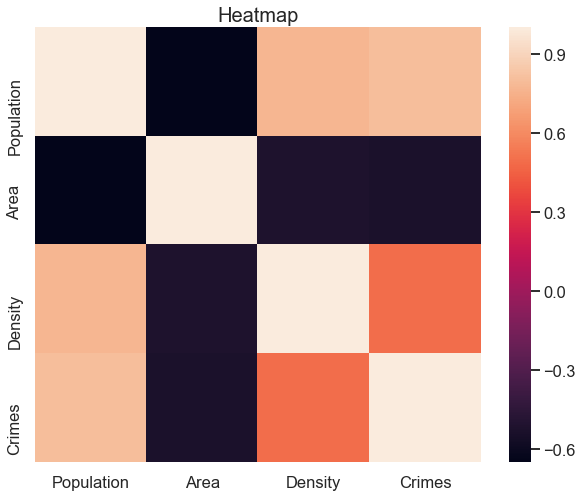

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Population.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Heatmap', fontsize=20)
fig.tight_layout()
plt.savefig('Jonas_image_02.jpg') # output image file

In [35]:
Average_Crime = Group_Province.groupby('Category').transform('mean')
Average_Crime_Rank = Average_Crime.rank()
Average_Crime_Rank

NameError: name 'Group_Province' is not defined

In [ ]:
for Province, Province_df in Group_Province:
    print(Province)
    print(Province_df)

In [ ]:
Group_Province.get_group('Eastern Cape')
Group_Province.sum(exclude=['Population', 'Area', 'Density'])

In [ ]:
Group_Province.get_group('Western Cape')

In [ ]:
Group_Province.get_group('Northern Cape')

In [ ]:
Group_Province.get_group('Gauteng')

In [ ]:
Group_Province.get_group('North West')

In [ ]:
Group_Province.get_group('Free State')

In [ ]:
Group_Province.get_group('Limpopo')

In [ ]:
Group_Province.get_group('Mpumalanga')

In [ ]:
Group_Province.get_group('Kwazulu/Natal')